In [1]:
import pandas as pd
from typing import List, Tuple
import matplotlib.pyplot as pltw
import numpy as np

In [30]:
# Print the list of discount factors, but every element multiplied by 30
plotting_values = [factor * 30 for factor in discount_factors]

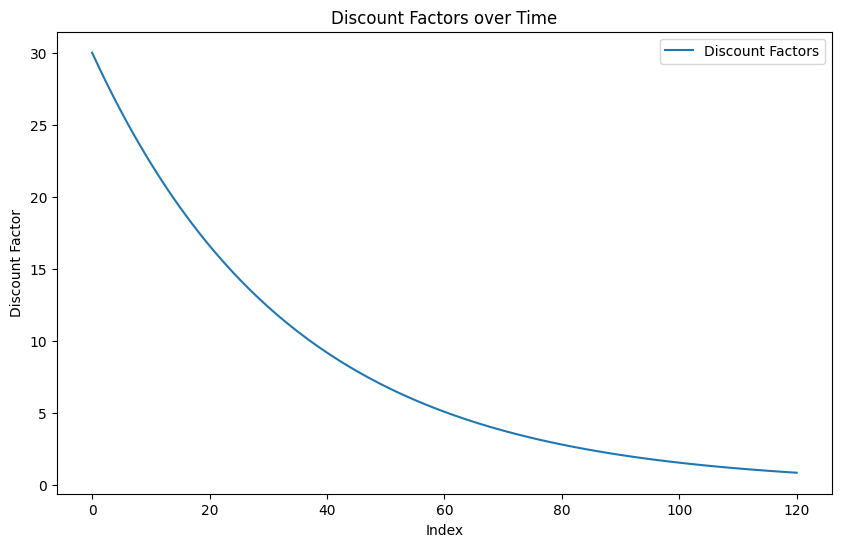

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(plotting_values)), plotting_values, label='Discount Factors')  # Use range(len(plotting_values)) for x-axis
plt.xlabel('Index')
plt.ylabel('Discount Factor')
plt.title('Discount Factors over Time')
plt.legend()
plt.show()

In [8]:
def cumulative_transaction_cost_function(time: float, cost_factor: float, decay_factor: float) -> float:
    """This function spells out the cumulative transaction cost function dependent on time"""

    cumulative_transaction_cost = cost_factor * ((1-np.exp(-decay_factor*time)) / decay_factor) 

    return cumulative_transaction_cost


def calculate_transaction_costs(TA_treatment_high: bool, delay_treatment_high: bool, total_bargaining_time: int) -> Tuple[List[float], List[float]]:
    """
    Calculate the cumulative costs over time with a decay factor depending on the treatment andotre
    compute the differences between each consecutive cost.

    Args:
        TA_treatment_high (bool): Whether the treatment for Transactional Adjustment is high.
        total_bargaining_time (int): Total time in seconds for which the costs are to be calculated.

    Returns:
        Tuple[List[float], List[float]]: 
        - A list of cumulative costs at each second.
        - A list of differences between each second's cost and the next.
    """
    
    cost_factor = 0.375 if TA_treatment_high else 0.125
    
    decay_factor = 0.035 if delay_treatment_high else 0.01

    time_values = np.arange(0, total_bargaining_time + 1)

    cumulative_costs = cumulative_transaction_cost_function(time_values, cost_factor, decay_factor)

    # Calculate the differences between each second's cost and the next
    cost_differences = np.append(np.diff(cumulative_costs), 0)

    return cumulative_costs, cost_differences    

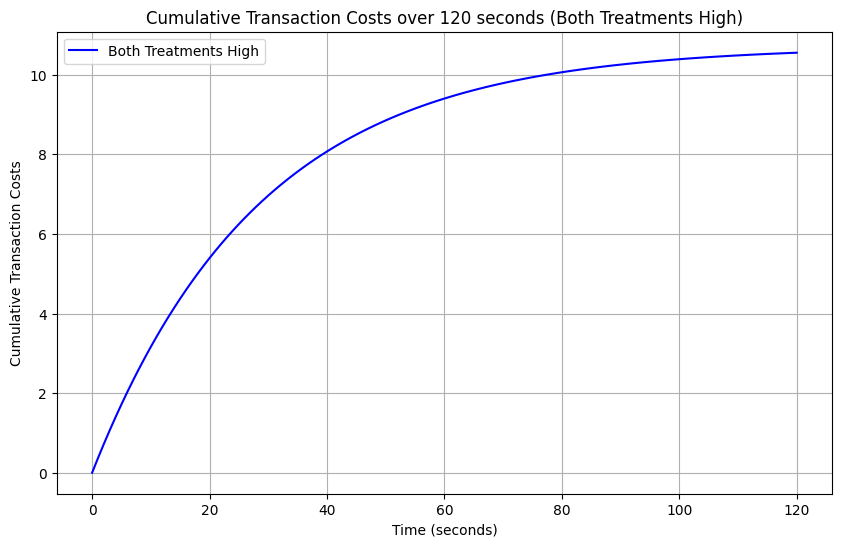

In [9]:
cumulative_costs, _ = calculate_transaction_costs(
    TA_treatment_high=True, 
    delay_treatment_high=True, 
    total_bargaining_time=120
)

# Plot cumulative transaction costs
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 121), cumulative_costs, label="Both Treatments High", color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Transaction Costs')
plt.title('Cumulative Transaction Costs over 120 seconds (Both Treatments High)')
plt.legend()
plt.grid(True)
plt.show()

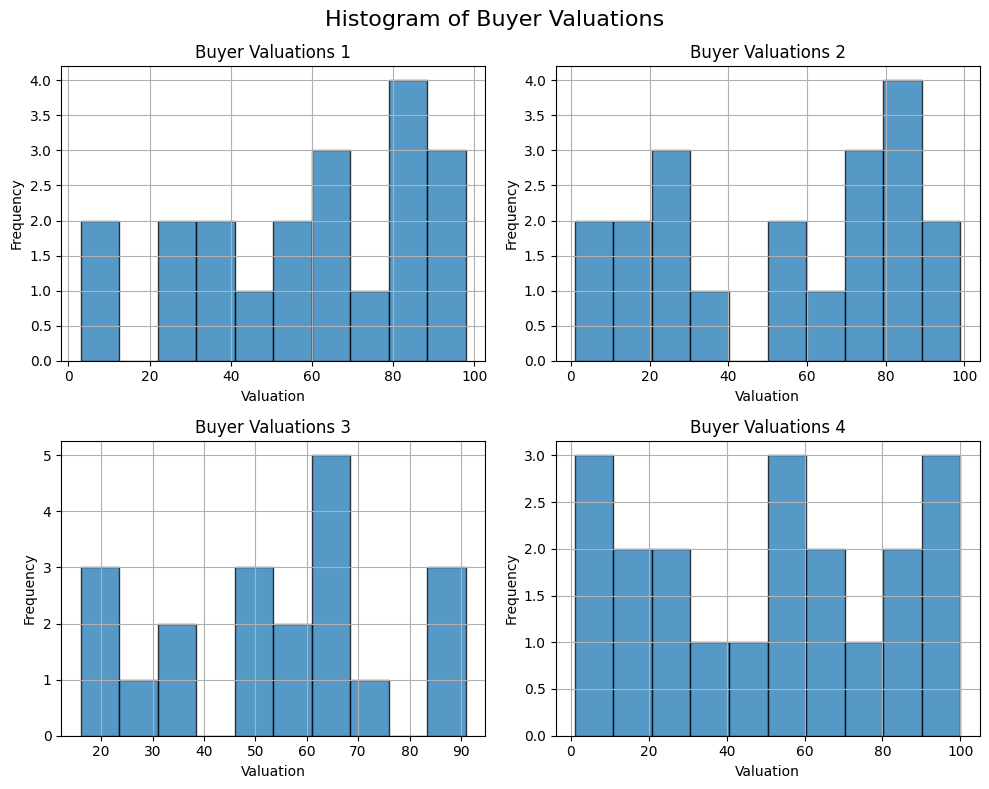

In [ ]:
# Create a plot grid for histograms
# Store the valuation vectors in a list
buyer_valuations = [
    buyer_valuations_1,
    buyer_valuations_2,
    buyer_valuations_3,
    buyer_valuations_4
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram of Buyer Valuations', fontsize=16)

# Plot histograms for each buyer valuation vector
for i, ax in enumerate(axes.flat, start=1):
    ax.hist(buyer_valuations[i-1], bins=10, alpha=0.75, edgecolor='black')
    ax.set_title(f'Buyer Valuations {i}')
    ax.set_xlabel('Valuation')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


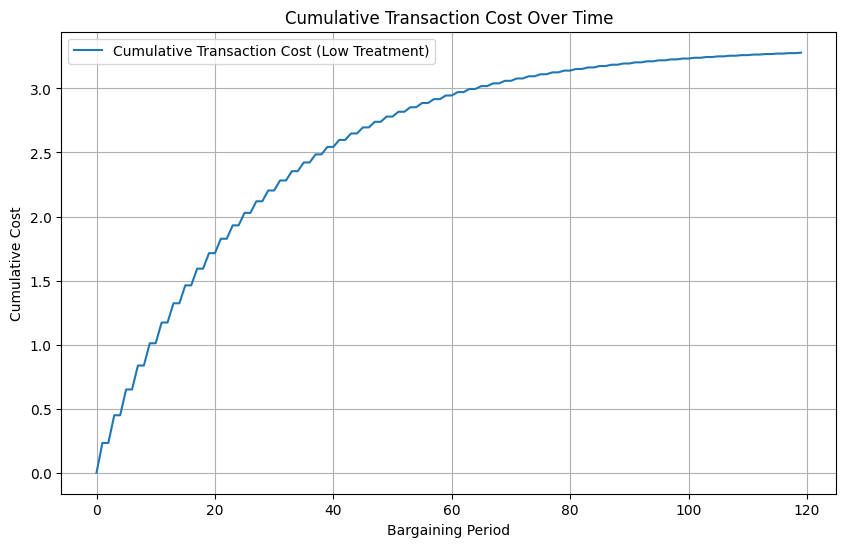

In [4]:
# Calculate the transaction costs for 120 seconds
total_bargaining_time = 120
cumulative_cost, _ = calculate_transaction_costs(TA_treatment_high=False, total_bargaining_time=total_bargaining_time)

# Plot the cumulative cost over time
plt.figure(figsize=(10, 6))
plt.plot(range(total_bargaining_time), cumulative_cost, label='Cumulative Transaction Cost (Low Treatment)')
plt.xlabel('Bargaining Period')
plt.ylabel('Cumulative Cost')
plt.title('Cumulative Transaction Cost Over Time')
plt.legend()
plt.grid(True)
plt.show()